In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Read in CSV and convert date column entries to datetime
df = pd.read_csv('./ProjectTweets.csv', names=['index', 'ids', 'date', 'flag', 'user', 'text'], parse_dates=['date'])
df['date'] = pd.to_datetime(df['date']).dt.date
pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head()

C:\Users\johno\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,index,ids,date,flag,user,text
0,0,1467810369,2009-04-06,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,2009-04-06,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,2009-04-06,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,2009-04-06,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,2009-04-06,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [88]:
# Count the number of rows per day
df.drop(['index', 'ids', 'flag', 'user'], axis=1, inplace=True)
df.index = pd.to_datetime(df.index)
tweet_count = df.resample('D').count()

print(tweet_count)

             text
date             
2009-04-06   3360
2009-04-07  17311
2009-04-08      0
2009-04-09      0
2009-04-10      0
...           ...
2009-06-21  16360
2009-06-22  12009
2009-06-23  17002
2009-06-24   6299
2009-06-25  19694

[81 rows x 1 columns]


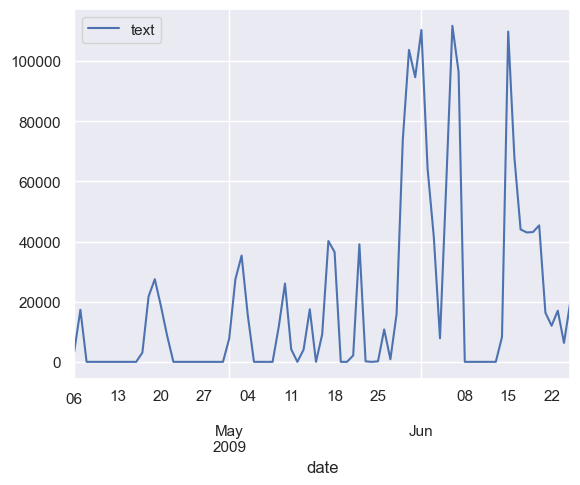

In [90]:
# Create a line plot of the daily counts
tweet_count.plot(kind='line')

# Show the plot
plt.show()